In [47]:
import xlrd
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
#import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
file_name = pd.ExcelFile("C://Users//adm//Documents//Programing lit//KPMG//KPMG.xlsx")
print(file_name.sheet_names)


['Title Sheet', 'Transactions', 'NewCustomerList', 'CustomerDemographic', 'CustomerAddress']


In [4]:
demo_df = pd.read_excel( "C://Users//adm//Documents//Programing lit//KPMG//KPMG.xlsx",sheet_name = "CustomerDemographic", index_col=0)
demo_df = demo_df.iloc[:,0:12]
demo_df.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
customer_id,,,,,,,,,,,,
1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [5]:
demo_df = demo_df.drop(['first_name', 'last_name', 'default', 'job_title'], axis=1)
demo_df['gender'].replace(['F', 'Femal'], 'Female', inplace=True)
demo_df['gender'].replace('M', 'Male', inplace=True)
demo_df['gender'].replace('U', 'Unknown', inplace=True)
demo_df['deceased_indicator'].replace(['N'], 0, inplace=True)
demo_df['deceased_indicator'].replace(['Y'], 1, inplace=True)
demo_df['owns_car'].replace('Yes', 1, inplace=True)
demo_df['owns_car'].replace('No', 0, inplace=True)
demo_df = demo_df[demo_df['DOB'] != demo_df.DOB.min()]
demo_df[demo_df['deceased_indicator'] == 0]
demo_df = demo_df.drop(['deceased_indicator'], axis=1)
demo_df_clean = demo_df.dropna()
demo_df_clean.head()

,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure
customer_id,,,,,,,
1,Female,93,1953-10-12,Health,Mass Customer,1,11.0
2,Male,81,1980-12-16,Financial Services,Mass Customer,1,16.0
3,Male,61,1954-01-20,Property,Mass Customer,1,15.0
4,Male,33,1961-10-03,IT,Mass Customer,0,7.0
6,Male,35,1966-09-16,Retail,High Net Worth,1,13.0


In [7]:
demo_df_clean['age']  = (dt.datetime.now() - demo_df_clean['DOB'])/np.timedelta64(1,'Y')
demo_df_clean['age_class'] = ((round(demo_df_clean['age'] / 10))*10).astype(int)
demo_df_clean.head()

,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure,age,age_class
customer_id,,,,,,,,,
1,Female,93,1953-10-12,Health,Mass Customer,1,11.0,68.462539,70
2,Male,81,1980-12-16,Financial Services,Mass Customer,1,16.0,41.283336,40
3,Male,61,1954-01-20,Property,Mass Customer,1,15.0,68.188748,70
4,Male,33,1961-10-03,IT,Mass Customer,0,7.0,60.487016,60
6,Male,35,1966-09-16,Retail,High Net Worth,1,13.0,55.534142,60


In [9]:
addr_df = pd.read_excel(file_name, header=1, sheet_name='CustomerAddress', index_col=0)
addr_df = addr_df.iloc[:,0:5]
addr_df.head()

,address,postcode,state,country,property_valuation
customer_id,,,,,
1,060 Morning Avenue,2016,New South Wales,Australia,10
2,6 Meadow Vale Court,2153,New South Wales,Australia,10
4,0 Holy Cross Court,4211,QLD,Australia,9
5,17979 Del Mar Point,2448,New South Wales,Australia,4
6,9 Oakridge Court,3216,VIC,Australia,9


In [10]:
addr_df['state'].replace('New South Wales', 'NSW', inplace=True)
addr_df['state'].replace('Victoria', 'VIC', inplace=True)
addr_df_clean = addr_df.dropna()
addr_df_clean.head()

,address,postcode,state,country,property_valuation
customer_id,,,,,
1,060 Morning Avenue,2016,NSW,Australia,10
2,6 Meadow Vale Court,2153,NSW,Australia,10
4,0 Holy Cross Court,4211,QLD,Australia,9
5,17979 Del Mar Point,2448,NSW,Australia,4
6,9 Oakridge Court,3216,VIC,Australia,9


In [11]:
demo_addr_df = pd.merge(demo_df_clean, addr_df_clean, left_index=True, right_index=True)
demo_addr_df= demo_addr_df.dropna()
demo_addr_df.head()

,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure,age,age_class,address,postcode,state,country,property_valuation
customer_id,,,,,,,,,,,,,,
1,Female,93,1953-10-12,Health,Mass Customer,1,11.0,68.462539,70,060 Morning Avenue,2016,NSW,Australia,10
2,Male,81,1980-12-16,Financial Services,Mass Customer,1,16.0,41.283336,40,6 Meadow Vale Court,2153,NSW,Australia,10
4,Male,33,1961-10-03,IT,Mass Customer,0,7.0,60.487016,60,0 Holy Cross Court,4211,QLD,Australia,9
6,Male,35,1966-09-16,Retail,High Net Worth,1,13.0,55.534142,60,9 Oakridge Court,3216,VIC,Australia,9
7,Female,6,1976-02-23,Financial Services,Affluent Customer,1,11.0,46.096577,50,4 Delaware Trail,2210,NSW,Australia,9


In [12]:
txns_df = pd.read_excel(file_name, header=0, sheet_name='Transactions', index_col=0)
txns_df = txns_df.sort_values('customer_id')
txns_df = txns_df.iloc[:,1:12]
txns_df.head()

,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
transaction_id,,,,,,,,,,,
14486,1,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,688.63,612.88,33455.0
18970,1,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,35378.0
16423,1,2017-12-09,1.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.40,37838.0
5157,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0
13424,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,38573.0


In [13]:
txns_df.isna().sum()

customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [14]:
txns_df.duplicated().sum()

0

In [15]:
txns_df.shape

(20000, 11)

In [16]:
txns_df['product_first_sold_date'] = pd.TimedeltaIndex(txns_df['product_first_sold_date'], unit='d') + dt.datetime(1900,1,1)
txns_df.head()

,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
transaction_id,,,,,,,,,,,
14486,1,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,688.63,612.88,1991-08-07
18970,1,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,1996-11-11
16423,1,2017-12-09,1.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.40,2003-08-07
5157,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,2003-07-23
13424,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2005-08-11


In [17]:
txns_df_clean = txns_df.dropna()
txns_df_clean.shape

(19445, 11)

In [18]:
txns_df_clean['transaction_date'].describe(datetime_is_numeric=True)

count                            19445
mean     2017-07-01 16:21:18.189766144
min                2017-01-01 00:00:00
25%                2017-04-01 00:00:00
50%                2017-07-03 00:00:00
75%                2017-10-02 00:00:00
max                2017-12-30 00:00:00
Name: transaction_date, dtype: object

In [19]:
most_recent_purchase = txns_df_clean['transaction_date'].max()
txns_df_clean['last_purchase_days_ago'] = most_recent_purchase - txns_df_clean['transaction_date']
txns_df_clean['last_purchase_days_ago'] /= np.timedelta64(1, 'D')
txns_df_clean['profit'] = txns_df_clean['list_price'] - txns_df_clean['standard_cost']
txns_df_clean.head()

,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,last_purchase_days_ago,profit
transaction_id,,,,,,,,,,,,,
14486,1,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,688.63,612.88,1991-08-07,278.0,75.75
18970,1,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,1996-11-11,276.0,509.97
16423,1,2017-12-09,1.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.40,2003-08-07,21.0,75.14
5157,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,2003-07-23,233.0,189.28
13424,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2005-08-11,312.0,17.87


In [20]:
txns_df_clean[txns_df_clean['last_purchase_days_ago'] > 365].shape

(0, 13)

In [21]:
rfmTable = txns_df_clean.groupby('customer_id').agg({
    'last_purchase_days_ago': lambda x: x.min(),
    'customer_id': lambda x: len(x),
    'profit': lambda x: x.sum()
})

rfmTable.rename(columns={
    'last_purchase_days_ago': 'recency', 
    'customer_id': 'frequency', 
    'profit': 'monetary_value'
    }, inplace=True
)

In [22]:
rfmTable.head()

,recency,frequency,monetary_value
customer_id,,,
1,7.0,11,3018.09
2,128.0,3,2226.26
3,102.0,7,3290.21
4,195.0,2,220.57
5,16.0,6,2394.94


In [23]:
rfmTable.shape

(3492, 3)

In [24]:
quartiles = rfmTable.quantile(q=[0.25,0.50,0.75])
quartiles

,recency,frequency,monetary_value
0.25,18.0,4.0,1797.43
0.50,45.0,5.0,2798.99
0.75,88.0,7.0,4122.44


In [25]:
def ROneHotEncoder(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else: 
        return 4
    
def FMOneHotEncoder(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else: 
        return 1

In [26]:
rfmSeg = rfmTable
rfmSeg['r_score'] = rfmSeg['recency'].apply(ROneHotEncoder, args=('recency', quartiles))
rfmSeg['f_score'] = rfmSeg['frequency'].apply(FMOneHotEncoder, args=('frequency', quartiles))
rfmSeg['m_score'] = rfmSeg['monetary_value'].apply(FMOneHotEncoder, args=('monetary_value', quartiles))
rfmSeg.head()

,recency,frequency,monetary_value,r_score,f_score,m_score
customer_id,,,,,,
1,7.0,11,3018.09,1,1,3
2,128.0,3,2226.26,4,4,2
3,102.0,7,3290.21,4,3,3
4,195.0,2,220.57,4,4,4
5,16.0,6,2394.94,1,3,2


In [27]:
rfmSeg['rfm_class'] = 100 * rfmSeg['r_score'] + 10 * rfmSeg['f_score'] + rfmSeg['m_score']
rfmSeg['total_score'] = rfmSeg['r_score'] + rfmSeg['f_score'] + rfmSeg['m_score']
rfmSeg.head()

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score
customer_id,,,,,,,,
1,7.0,11,3018.09,1,1,3,113,5
2,128.0,3,2226.26,4,4,2,442,10
3,102.0,7,3290.21,4,3,3,433,10
4,195.0,2,220.57,4,4,4,444,12
5,16.0,6,2394.94,1,3,2,132,6


In [28]:
rfm_quartiles = (rfmSeg['rfm_class'].min(), rfmSeg['rfm_class'].quantile(q=0.25),
                 rfmSeg['rfm_class'].median(), rfmSeg['rfm_class'].quantile(q=0.75), 
                 rfmSeg['rfm_class'].max())
rfm_quartiles

(111, 144.0, 244.0, 344.0, 444)

In [29]:
def RFMClassOneHotEncoder(x, p, d):
    if x <= d[0]:
        return 'gold'
    elif x <= d[1]:
        return 'silver'
    elif x <= d[2]: 
        return 'bronze'
    else: 
        return 'basic'

rfmSeg['customer_title'] = rfmSeg['rfm_class'].apply(RFMClassOneHotEncoder, args=('rfm_class', rfm_quartiles))
rfmSeg

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score,customer_title
customer_id,,,,,,,,,
1,7.0,11,3018.090000,1,1,3,113,5,silver
2,128.0,3,2226.260000,4,4,2,442,10,basic
3,102.0,7,3290.210000,4,3,3,433,10,basic
4,195.0,2,220.570000,4,4,4,444,12,basic
5,16.0,6,2394.940000,1,3,2,132,6,silver
...,...,...,...,...,...,...,...,...,...
3497,52.0,3,1648.320000,3,4,4,344,11,basic
3498,127.0,6,3147.330000,4,3,3,433,10,basic
3499,51.0,7,4955.250000,3,3,1,331,7,basic


In [56]:
addr_demo_txns = pd.merge(rfmSeg, demo_addr_df, left_index=True, right_index=True)
addr_demo_txns.columns

Index(['recency', 'frequency', 'monetary_value', 'r_score', 'f_score',
       'm_score', 'rfm_class', 'total_score', 'customer_title', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_industry_category',
       'wealth_segment', 'owns_car', 'tenure', 'age', 'age_class', 'address',
       'postcode', 'state', 'country', 'property_valuation'],
      dtype='object')

In [31]:
addr_demo_txns.shape

(2850, 23)

Text(0.5, 1.0, 'Graph Of Recency')

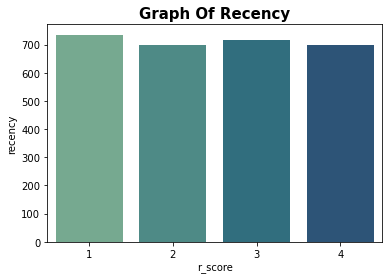

In [37]:
cc = addr_demo_txns.groupby('r_score').agg('recency').count().to_frame()
ccc =pd.DataFrame({'r_score':[1,2,3,4],'recency':[735,699,716,700]})
ax1 = sns.barplot(x="r_score",y = "recency", data = ccc,palette='crest' )
plt.title("Graph Of Recency",weight = "bold", fontsize = 15)

<AxesSubplot:xlabel='total_score', ylabel='recency'>

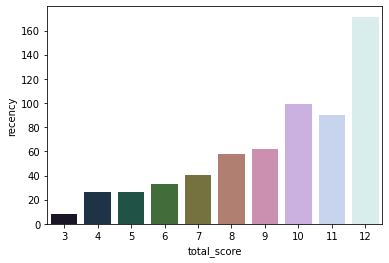

In [89]:
aa = addr_demo_txns.groupby('total_score').agg('recency').mean().to_frame()
sns.barplot(x= aa.index, y = aa.recency, palette = 'cubehelix')

Text(0.5, 1.0, 'Distribution of Monetary Value')

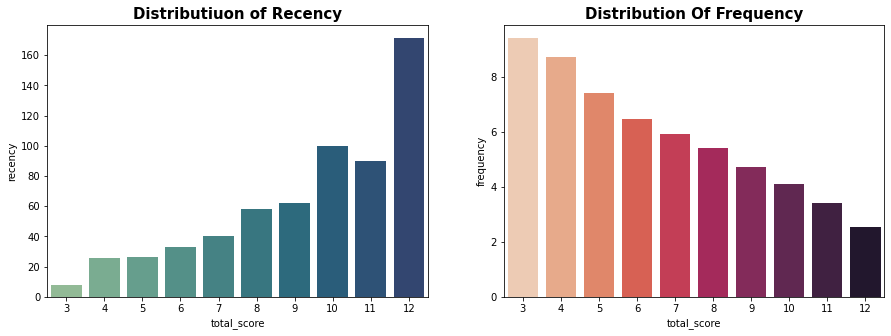

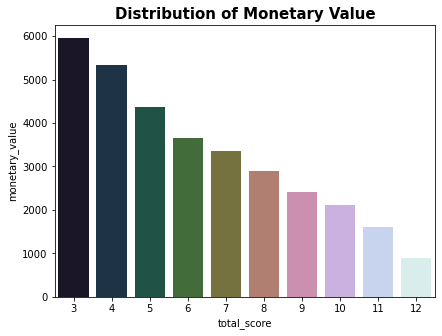

In [71]:
dd = addr_demo_txns.groupby('total_score').agg('recency').mean().to_frame()
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.barplot(x = dd.index, y = dd.recency, palette = "crest" )
plt.title("Distributiuon of Recency", weight = "bold", fontsize = 15)

dd1 = addr_demo_txns.groupby('total_score').agg('frequency').mean().to_frame()
ax1 = plt.subplot2grid((1,2),(0,1))
sns.barplot(x = dd1.index , y = dd1.frequency, palette = 'rocket_r')
plt.title("Distribution Of Frequency",fontsize = 15, weight= "bold")

fig = plt.figure(figsize= (15,5))
dd2 = addr_demo_txns.groupby('total_score').agg('monetary_value').mean().to_frame()
ax1 = plt.subplot2grid((1,2),(0,0))
sns.barplot(x=dd2.index, y = dd2.monetary_value, palette = 'cubehelix')
plt.title("Distribution of Monetary Value", weight = "bold",fontsize = 15)

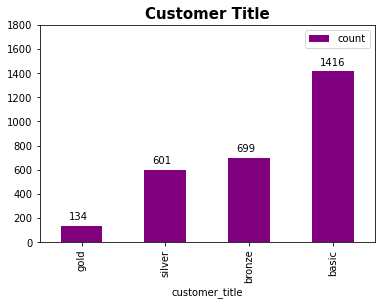

In [88]:
customer_titles_df = addr_demo_txns.groupby('customer_title').agg({
    'rfm_class': lambda x: len(x)
})
customer_titles_df.rename(columns={'rfm_class': 'count'}, inplace=True)
customer_titles_df.sort_values('count').plot(kind='bar', color = "purple")
for i, v in enumerate(customer_titles_df.sort_values('count')['count']):
    plt.text(i - .15, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1800])
plt.title('Customer Title',weight = "bold", fontsize = 15)
plt.show()

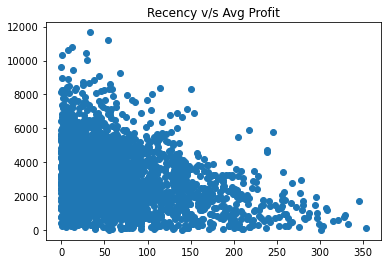

In [37]:
plt.scatter(addr_demo_txns['recency'], addr_demo_txns['monetary_value'])
plt.title('Recency v/s Avg Profit')
plt.show()

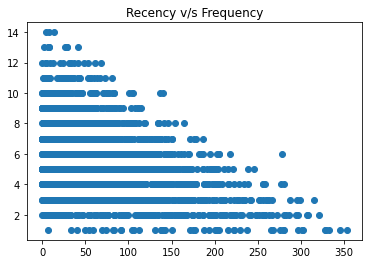

In [38]:
plt.scatter(addr_demo_txns['recency'], addr_demo_txns['frequency'])
plt.title('Recency v/s Frequency')
plt.show()

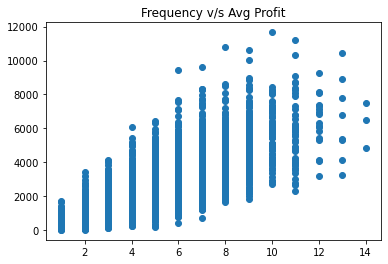

In [39]:
plt.scatter(addr_demo_txns['frequency'], addr_demo_txns['monetary_value'])
plt.title('Frequency v/s Avg Profit')
plt.show()

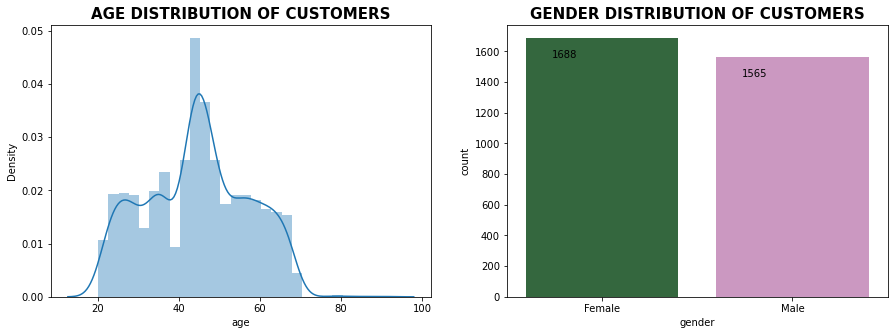

In [116]:
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(demo_addr_df['age'])
plt.title('AGE DISTRIBUTION OF CUSTOMERS', fontsize = 15, weight = "bold")

ax1 =  plt.subplot2grid((1,2),(0,1))
ax = sns.countplot(demo_addr_df['gender'],palette='cubehelix')
plt.title("GENDER DISTRIBUTION OF CUSTOMERS", weight = 'bold', size = 15)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black')

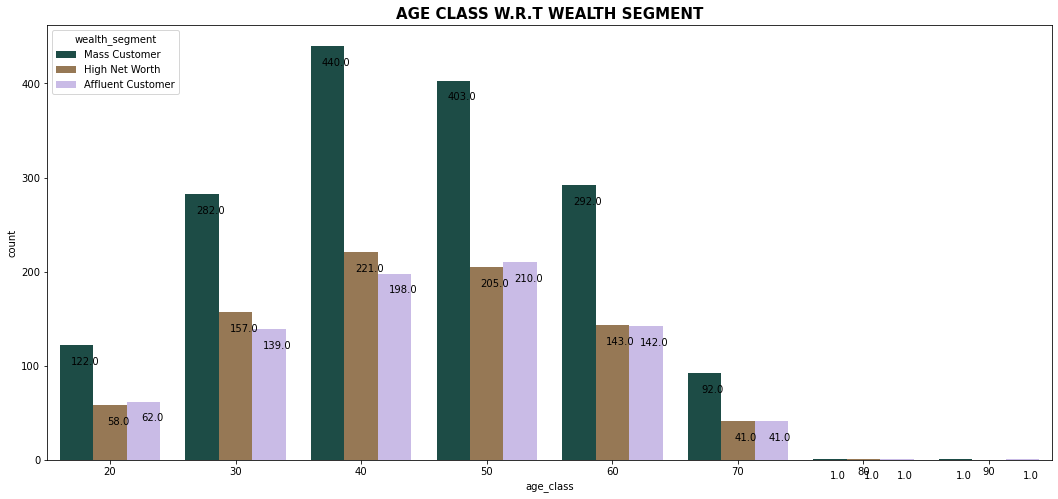

In [114]:
plt.figure(figsize=(18,8))
ax = sns.countplot(demo_addr_df['age_class'],hue = 'wealth_segment' , data = demo_addr_df, palette = 'cubehelix' )
plt.title("AGE CLASS W.R.T WEALTH SEGMENT", weight = 'bold', fontsize = 15)
total = float(len(demo_addr_df))
#for p in ax.patches:
    #percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    #x = p.get_x() + p.get_width()
    #y = p.get_height()
    #width = p.get_width
    #ax.annotate(percentage, (x, y),ha='center')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black')

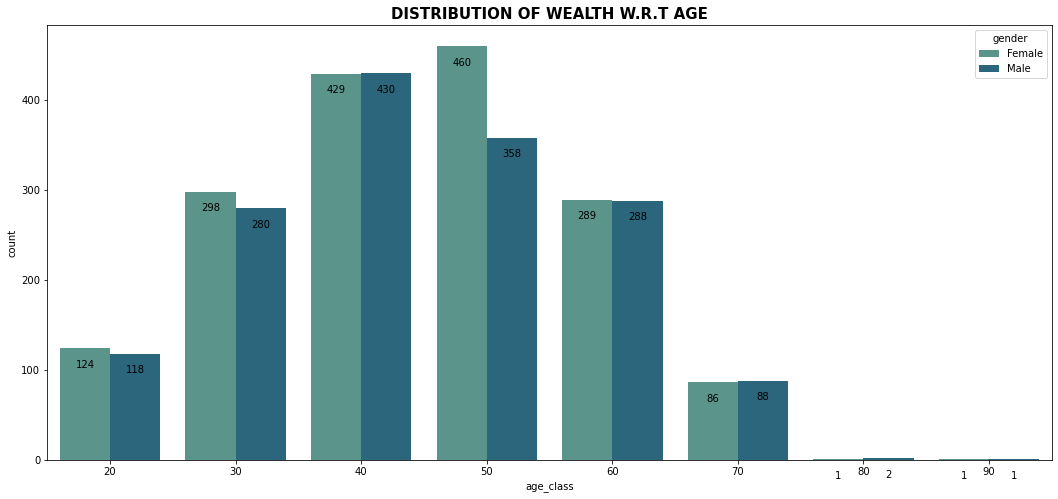

In [115]:
plt.figure(figsize=(18,8))
ax = sns.countplot(demo_addr_df['age_class'],hue = 'gender' , data = demo_addr_df, palette = 'crest' )
plt.title("DISTRIBUTION OF WEALTH W.R.T AGE", weight = 'bold', fontsize = 15)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black')

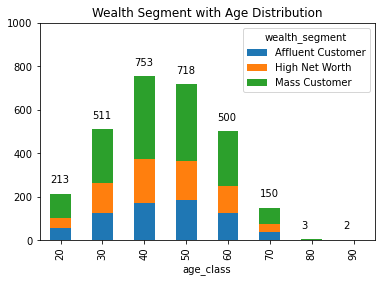

In [40]:
addr_demo_txns.groupby('age_class')['wealth_segment'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(addr_demo_txns.groupby('age_class') \
                      .agg({'wealth_segment': lambda x: len(x)})['wealth_segment']):
    plt.text(i - .25, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1000])
plt.title('Wealth Segment with Age Distribution')
plt.show()

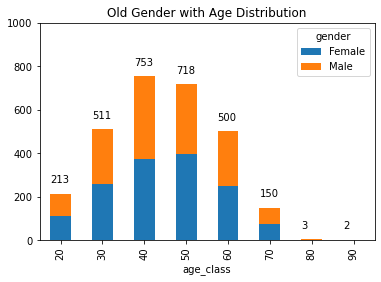

In [41]:
addr_demo_txns.groupby('age_class')['gender'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(addr_demo_txns.groupby('age_class') \
                      .agg({'gender': lambda x: len(x)})['gender']):
    plt.text(i - .25, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1000])
plt.title('Old Gender with Age Distribution')
plt.show()

<Figure size 1296x576 with 0 Axes>

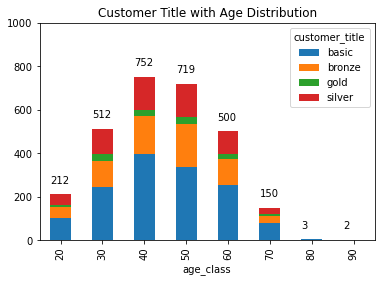

In [120]:
plt.figure(figsize=(18,8))
addr_demo_txns.groupby('age_class')['customer_title'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(addr_demo_txns.groupby('age_class') \
                      .agg({'customer_title': lambda x: len(x)})['customer_title']):
    plt.text(i - .25, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1000])
plt.title('Customer Title with Age Distribution')
plt.show()

In [118]:
plt.figure(figsize=(18,8))
ax = sns.countplot(addr_demo_txns['age_class'],hue = 'customer_title' , data = demo_addr_df, palette = 'crest' )
plt.title("DISTRIBUTION OF WEALTH W.R.T AGE", weight = 'bold', fontsize = 15)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black')

ValueError: Could not interpret input 'customer_title'

<Figure size 1296x576 with 0 Axes>

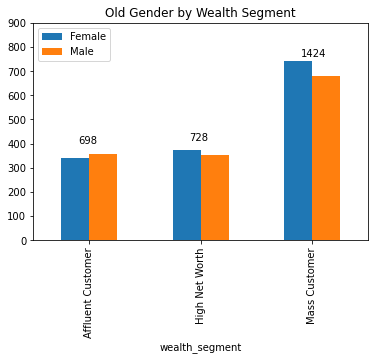

In [43]:

addr_demo_txns.groupby('wealth_segment')['gender'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=False)
for i, v in enumerate(addr_demo_txns.groupby('wealth_segment') \
                      .agg({'gender': lambda x: len(x)})['gender']):
    plt.text(i - .1, v // 2 + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 900])
plt.title('Old Gender by Wealth Segment')
plt.legend(['Female', 'Male'], loc='upper left')
plt.show()

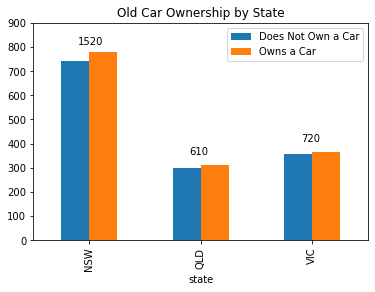

In [44]:
addr_demo_txns.groupby('state')['owns_car'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=False)
for i, v in enumerate(addr_demo_txns.groupby('state') \
                      .agg({'owns_car': lambda x: len(x)})['owns_car']):
    plt.text(i - .1, v // 2 + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 900])
plt.title('Old Car Ownership by State')
plt.legend(['Does Not Own a Car', 'Owns a Car'], loc='upper right')
plt.show()

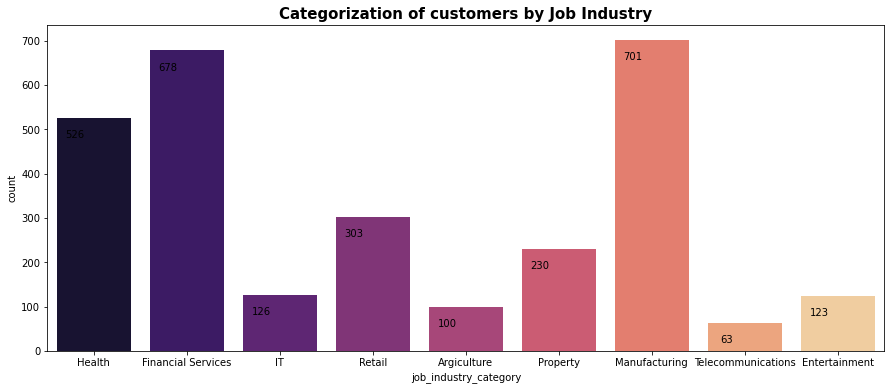

In [134]:
plt.figure(figsize=(15,6))
ax = sns.countplot(addr_demo_txns['job_industry_category'], data = demo_addr_df, palette = 'magma' , orient = 'h')
plt.title("Categorization of customers by Job Industry", weight = 'bold', fontsize = 15)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black')



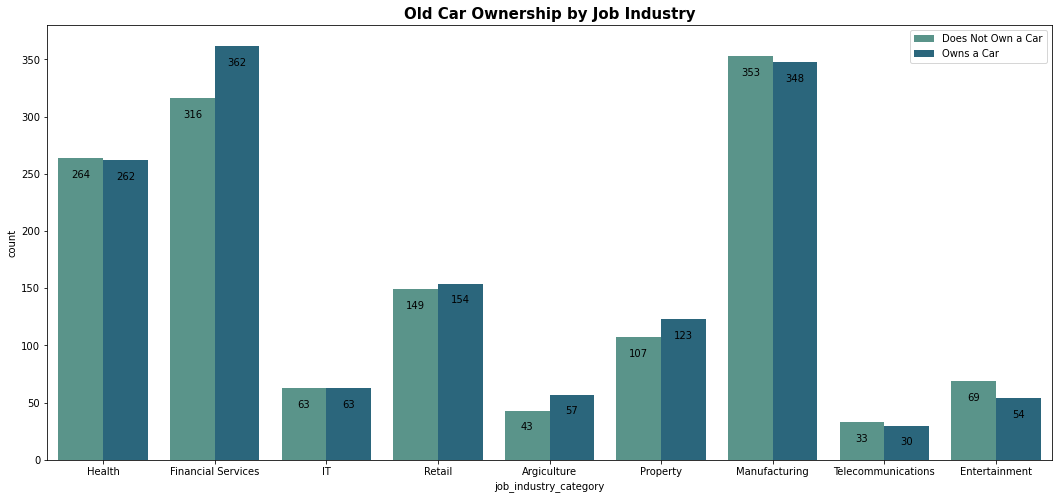

In [130]:
plt.figure(figsize=(18,8))
ax = sns.countplot(addr_demo_txns['job_industry_category'],hue = 'owns_car' , data = demo_addr_df, palette = 'crest' , orient = 'h')
plt.title("Old Car Ownership by Job Industry", weight = 'bold', fontsize = 15)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black')

plt.legend(['Does Not Own a Car', 'Owns a Car'])

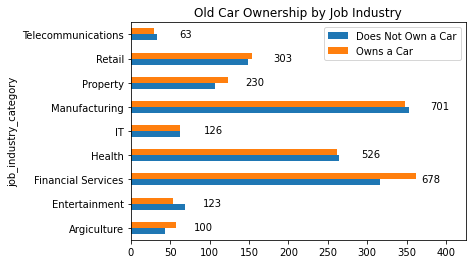

In [45]:
addr_demo_txns.groupby('job_industry_category')['owns_car'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.barh(stacked=False)
for i, v in enumerate(addr_demo_txns.groupby('job_industry_category') \
                      .agg({'owns_car': lambda x: len(x)})['owns_car']):
    plt.text(v // 2 + 30, i - .1, int(v), color='black')
axes = plt.gca()
axes.set_xlim([0,425])
plt.title('Old Car Ownership by Job Industry')
plt.legend(['Does Not Own a Car', 'Owns a Car'], loc='upper right')
plt.show()

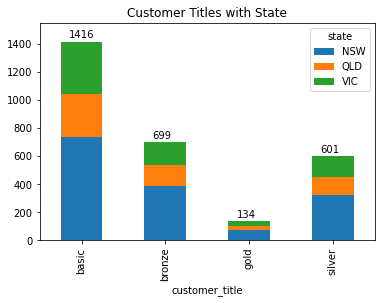

In [46]:
addr_demo_txns.groupby('customer_title')['state'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(addr_demo_txns.groupby('customer_title') \
                      .agg({'state': lambda x: len(x)})['state']):
    plt.text(i - .15, v + 25, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1550])
plt.title('Customer Titles with State')
plt.show()

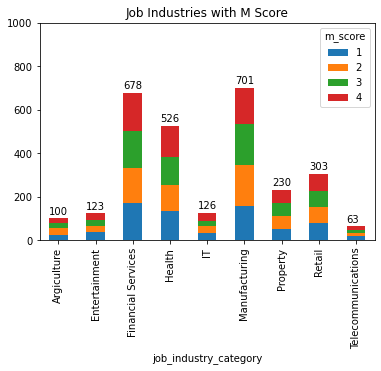

In [47]:
addr_demo_txns.groupby('job_industry_category')['m_score'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(addr_demo_txns.groupby('job_industry_category') \
                      .agg({'m_score': lambda x: len(x)})['m_score']):
    plt.text(i - .25, v + 20, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1000])
plt.title('Job Industries with M Score')
plt.show()

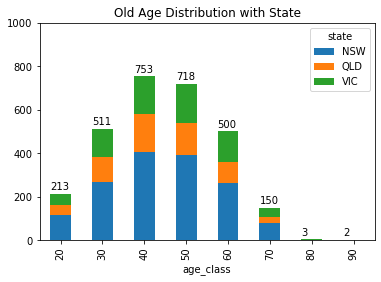

In [48]:
addr_demo_txns.groupby('age_class')['state'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(addr_demo_txns.groupby('age_class').agg({'age': lambda x: len(x)})['age']):
    plt.text(i - .25, v + 20, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1000])
plt.title('Old Age Distribution with State')
plt.show()

In [49]:
c = addr_demo_txns.groupby(['gender'])['past_3_years_bike_related_purchases'].sum().rename('count').to_frame()
c

,count
gender,
Female,69844
Male,69516


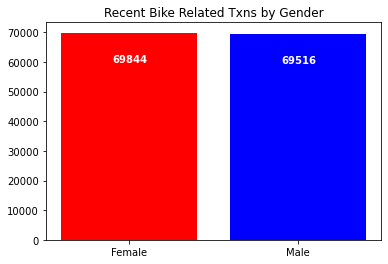

In [50]:
labels = ['Female', 'Male']
plt.bar(labels, c['count'], color=['red','blue'])
for i, v in enumerate(c['count']):
    plt.text(i - .1, v - 10e3, v, color='white', fontweight='bold')
plt.title('Recent Bike Related Txns by Gender')
plt.show()

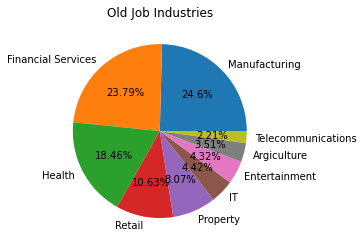

In [51]:
addr_demo_txns.job_industry_category.value_counts().plot.pie(autopct=lambda pct: str(round(pct, 2)) + '%')
plt.title('Old Job Industries')
plt.ylabel('')
plt.show()

In [52]:
c = addr_demo_txns.groupby('customer_title').agg({'age': lambda x: len(x)})
c.rename(columns={'age':'count'},inplace=True)
c['count'] = c['count'].astype(int)
c

,count
customer_title,
basic,1416
bronze,699
gold,134
silver,601


In [53]:
c = addr_demo_txns.groupby(['state','customer_title']).agg({'age': lambda x: len(x)})
c.rename(columns={'age':'count'},inplace=True)
c['count'] = c['count'].astype(int)
c

count
state customer_title       
NSW   basic             738
      bronze            389
      gold               70
      silver            323
QLD   basic             305
      bronze            146
      gold               33
      silver            126
VIC   basic             373
      bronze            164
      gold               31
      silver            152

In [54]:
c = addr_demo_txns.groupby(['total_score']).agg({'age': lambda x: x.count()}).cumsum()
c.rename(columns={'age':'count'},inplace=True)
c['count'] = c['count'].astype(int)
c

,count
total_score,
3,134
4,296
5,558
6,891
7,1300
8,1712
9,2110
10,2417
11,2595


In [62]:
new_cust_list = pd.read_excel(file_name, header=0, sheet_name='NewCustomerList')
new_cust_list.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.85,1.0625,1.328125,1.128906,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.42,0.4200,0.525000,0.446250,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.91,0.9100,0.910000,0.910000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.50,0.6250,0.625000,0.625000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.63,0.6300,0.787500,0.787500,4,4,1.703125


In [63]:
new_cust_list.isna().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Unnamed: 16                              0
Unnamed: 17                              0
Unnamed: 18                              0
Unnamed: 19                              0
Unnamed: 20                              0
Rank                                     0
Value                                    0
dtype: int6

In [57]:
new_cust_list.duplicated().sum()

0

In [58]:
new_cust_list.shape

(999, 23)

In [64]:
new_cust_list_clean = new_cust_list.dropna()
new_cust_list_clean

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.85,1.0625,1.328125,1.128906,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.42,0.4200,0.525000,0.446250,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.91,0.9100,0.910000,0.910000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.50,0.6250,0.625000,0.625000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.63,0.6300,0.787500,0.787500,4,4,1.703125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,...,NSW,Australia,7,0.46,0.4600,0.460000,0.460000,996,996,0.374000
996,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,...,NSW,Australia,10,0.92,0.9200,1.150000,0.977500,997,997,0.357000
997,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,...,QLD,Australia,2,0.94,1.1750,1.175000,1.175000,997,997,0.357000
998,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,...,QLD,Australia,2,0.80,1.0000,1.000000,0.850000,997,997,0.357000


In [65]:
new_cust_list_clean['age'] = (dt.datetime.now() - new_cust_list_clean['DOB']) / np.timedelta64(1, 'Y')
new_cust_list_clean['age_class'] = ((round(new_cust_list_clean['age'] / 10)) * 10).astype(int)
new_cust_list_clean.head()

<ipython-input-65-7e594cdcb531>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_cust_list_clean['age'] = (dt.datetime.now() - new_cust_list_clean['DOB']) / np.timedelta64(1, 'Y')
<ipython-input-65-7e594cdcb531>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_cust_list_clean['age_class'] = ((round(new_cust_list_clean['age'] / 10)) * 10).astype(int)


,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value,age,age_class
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,6,0.85,1.0625,1.328125,1.128906,1,1,1.718750,64.709210,60
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,11,0.42,0.4200,0.525000,0.446250,1,1,1.718750,52.016273,50
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,5,0.91,0.9100,0.910000,0.910000,1,1,1.718750,47.580864,50
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,1,0.50,0.6250,0.625000,0.625000,4,4,1.703125,43.161882,40
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,9,0.63,0.6300,0.787500,0.787500,4,4,1.703125,56.514654,60


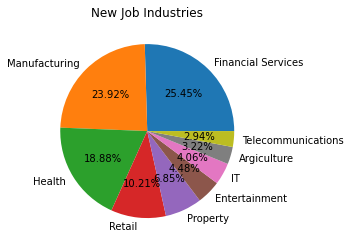

In [66]:
new_cust_list_clean.job_industry_category.value_counts().plot.pie(autopct=lambda pct: str(round(pct, 2)) + '%')
plt.title('New Job Industries')
plt.ylabel('')
plt.show()

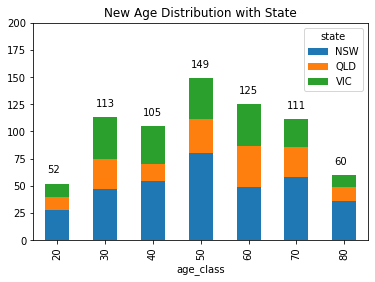

In [67]:
new_cust_list_clean.groupby('age_class')['state'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(new_cust_list_clean.groupby('age_class').agg({'age': lambda x: len(x)})['age']):
    plt.text(i - .2, v + 10, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 200])
plt.title('New Age Distribution with State')
plt.show()

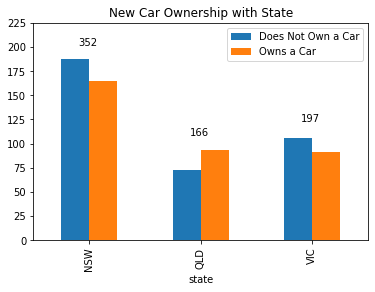

In [68]:
new_cust_list_clean.groupby('state')['owns_car'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=False)
for i, v in enumerate(new_cust_list_clean.groupby('state').agg({'owns_car': lambda x: len(x)})['owns_car']):
    plt.text(i - .1, v // 2 + 25, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 225])
plt.title('New Car Ownership with State')
plt.legend(['Does Not Own a Car', 'Owns a Car'])
plt.show()

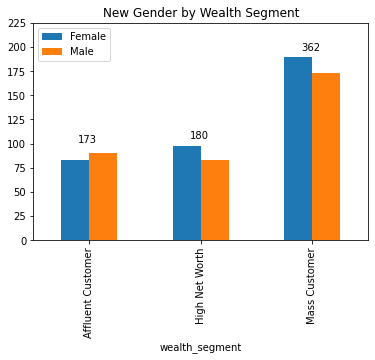

In [69]:
new_cust_list_clean.groupby('wealth_segment')['gender'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=False)
for i, v in enumerate(new_cust_list_clean.groupby('wealth_segment') \
                      .agg({'gender': lambda x: len(x)})['gender']):
    plt.text(i - .1, v // 2 + 15, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 225])
plt.title('New Gender by Wealth Segment')
plt.legend(['Female', 'Male'], loc='upper left')
plt.show()

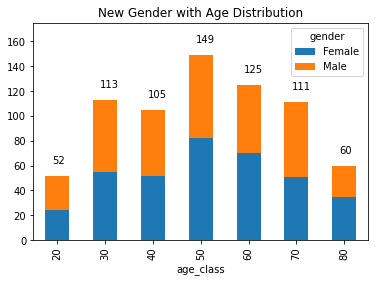

In [70]:
new_cust_list_clean.groupby('age_class')['gender'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(new_cust_list_clean.groupby('age_class') \
                      .agg({'gender': lambda x: len(x)})['gender']):
    plt.text(i - .1, v + 10, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 175])
plt.title('New Gender with Age Distribution')
plt.show()

In [71]:
addr_demo_txns['customer_segment'] = addr_demo_txns['total_score'].map({
    3: 'Platinum',
    4: 'Very Loyal',
    5: 'Becoming Loyal',
    6: 'Recent',
    7: 'Average',
    8: 'High Risk',
    9: 'Evasive',
    10: 'Losing',
    11: 'Inactive',
    12: 'Lost'
})
addr_demo_txns

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score,customer_title,gender,...,owns_car,tenure,age,age_class,address,postcode,state,country,property_valuation,customer_segment
customer_id,,,,,,,,,,,,,,,,,,,,,
1,7.0,11,3018.09,1,1,3,113,5,silver,Female,...,1,11.0,68.457333,70,060 Morning Avenue,2016,NSW,Australia,10,Becoming Loyal
2,128.0,3,2226.26,4,4,2,442,10,basic,Male,...,1,16.0,41.278130,40,6 Meadow Vale Court,2153,NSW,Australia,10,Losing
4,195.0,2,220.57,4,4,4,444,12,basic,Male,...,0,7.0,60.481810,60,0 Holy Cross Court,4211,QLD,Australia,9,Lost
6,64.0,5,3946.55,3,2,3,323,8,basic,Male,...,1,13.0,55.528936,60,9 Oakridge Court,3216,VIC,Australia,9,High Risk
7,253.0,3,220.11,4,4,4,444,12,basic,Female,...,1,11.0,46.091371,50,4 Delaware Trail,2210,NSW,Australia,9,Lost
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3496,256.0,4,2045.84,4,4,2,442,10,basic,Male,...,1,19.0,35.922784,40,2565 Caliangt Point,2171,NSW,Australia,9,Losing
3497,52.0,3,1648.32,3,4,4,344,11,basic,Female,...,1,18.0,35.900881,40,96 Delladonna Trail,3976,VIC,Australia,5,Inactive
3498,127.0,6,3147.33,4,3,3,433,10,basic,Female,...,0,5.0,26.400344,30,3 Nova Point,3012,VIC,Australia,4,Losing


In [72]:
top_1000 = addr_demo_txns.sort_values('rfm_class').head(1000)
top_1000

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score,customer_title,gender,...,owns_car,tenure,age,age_class,address,postcode,state,country,property_valuation,customer_segment
customer_id,,,,,,,,,,,,,,,,,,,,,
973,8.0,8,6639.85,1,1,1,111,3,gold,Female,...,0,15.0,42.652560,40,42 Dahle Parkway,3806,VIC,Australia,7,Platinum
2391,12.0,10,5862.45,1,1,1,111,3,gold,Female,...,0,14.0,60.930827,60,9501 Melby Avenue,4178,QLD,Australia,7,Platinum
1000,0.0,9,5383.48,1,1,1,111,3,gold,Female,...,0,11.0,43.638206,40,4757 Texas Trail,3136,VIC,Australia,9,Platinum
2464,2.0,13,7817.10,1,1,1,111,3,gold,Male,...,0,6.0,38.975550,40,3126 Butterfield Pass,2573,NSW,Australia,8,Platinum
2476,14.0,14,7493.23,1,1,1,111,3,gold,Male,...,0,17.0,65.503131,70,567 Scott Park,4118,QLD,Australia,5,Platinum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3047,34.0,5,3909.14,2,2,3,223,7,bronze,Male,...,1,19.0,60.199806,60,85 Northland Circle,2077,NSW,Australia,10,Average
208,27.0,5,3342.02,2,2,3,223,7,bronze,Male,...,0,5.0,27.405155,30,056 Stone Corner Alley,4078,QLD,Australia,7,Average
1697,24.0,5,3042.48,2,2,3,223,7,bronze,Female,...,1,12.0,52.996372,50,9037 Norway Maple Junction,2087,NSW,Australia,11,Average


In [74]:
writer = pd.ExcelWriter('kpmg_cleaned_data.xlsx',
                        engine = 'xlsxwriter')
addr_demo_txns.to_excel(writer, sheet_name = 'Dataset')
top_1000.to_excel(writer, sheet_name = 'Top 1000')
writer.save()
writer.close()